In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

In [260]:
data= pd.read_csv("Absenteeism_at_work.csv",delimiter=";")

In [261]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [262]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


Encoding the 'Reason for absence' feature

In [263]:
reason=np.array(data['Reason for absence'])


In [264]:
nt=[]
for i in reason:
    op = [0 for i in range(1,30)]
    op[i-1] = 1
    nt.append(op)

In [265]:
names = [f"rfa{i}" for i in range(1,30)]
reasons=pd.DataFrame(nt, columns=names)
reasons=reasons.drop("rfa20",axis=1)
target=pd.DataFrame(data['Absenteeism time in hours'])
reasons=pd.concat([reasons,target],axis=1)
reasons

,rfa1,rfa2,rfa3,rfa4,rfa5,rfa6,rfa7,rfa8,rfa9,rfa10,...,rfa21,rfa22,rfa23,rfa24,rfa25,rfa26,rfa27,rfa28,rfa29,Absenteeism time in hours
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,8
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,8


In [266]:
data1=data.drop('Reason for absence',axis=1)

In [453]:
#pie chart for reasons for absence
c = []
for col in reasons.iloc[:,:-1]:
    i,j,*k = reasons[col].value_counts()
    c.append(j*100/740)
    


In [454]:

count=0
mydict = dict()
for col in reasons.iloc[:,:-1]:
    mydict[col] = []
    for i,val in enumerate(reasons[col]):
        if val==1:
            mydict[col].append(reasons.iloc[i,-1])
           

In [455]:
for key in mydict:
    mydict[key] = np.mean(mydict[key])

In [456]:

value_list=list(mydict.values())
v = np.array(value_list)
value_list = v * 100 / 120.
value_list

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [457]:
labels = list(reasons.columns.values)


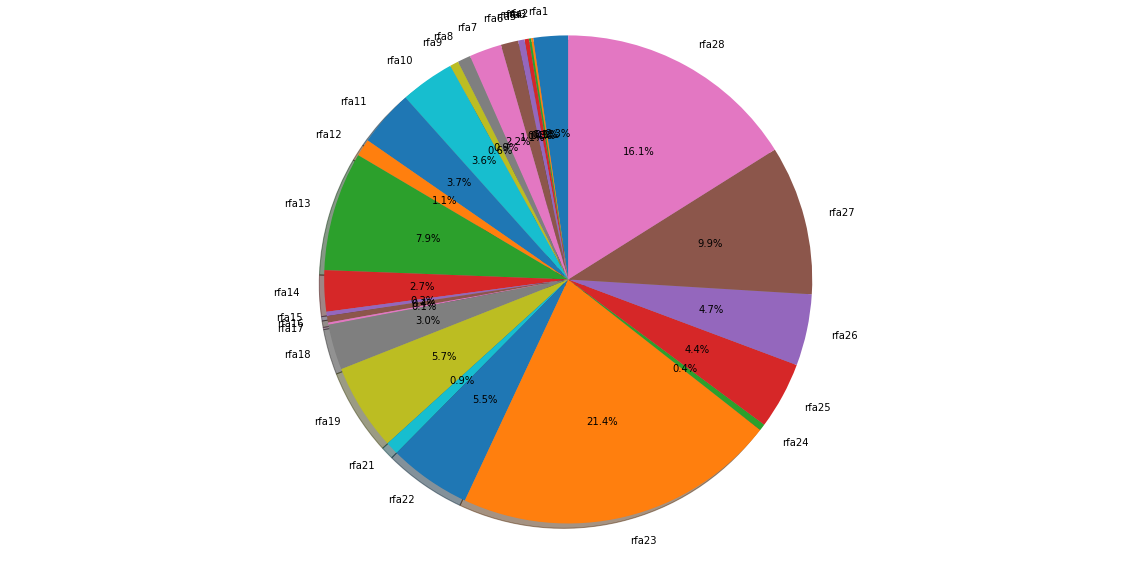

In [463]:
labels = list(reasons.columns.values)[:-1]
sizes = c


fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

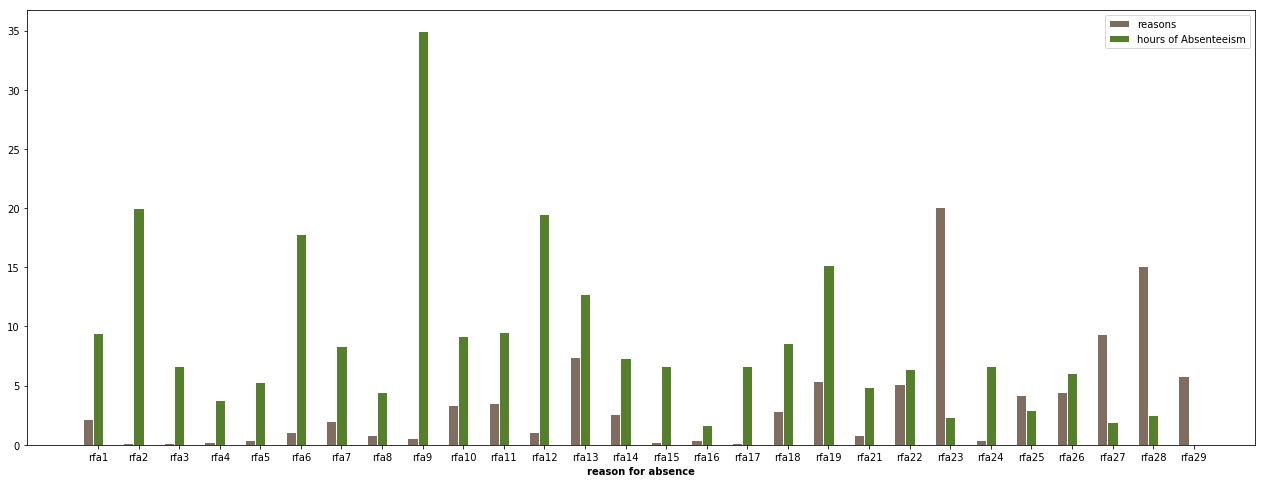

In [274]:

# x = np.arange(len(labels))
# values=[c,value_list]

# fig, ax = plt.subplots(figsize=(22,8))
# plt.bar(x, values)
# plt.xticks(x, labels)
# plt.show()

fig, ax = plt.subplots(figsize=(22,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = c
bars2 = value_list
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='reasons')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='hours of Absenteeism')
 
# Add xticks on the middle of the group bars
plt.xlabel('reason for absence', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [394]:
reasons=reasons.drop('Absenteeism time in hours',axis=1)

In [397]:
final_data=pd.concat([reasons,data1],axis=1)


Encoding and analysis of 'Month of absence' feature


In [307]:
month=np.array(data['Month of absence'])

In [308]:
nt=[]
op=[0]*13
for i in month:
    op = [0 for i in range(13)]
    op[i]=1
    nt.append(op)

In [331]:
names = [f"month{i}" for i in range(13)]
months=pd.DataFrame(nt, columns=names)
months=pd.concat([months,target],axis=1)
months=months.drop('month0',axis=1)

months

,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,Absenteeism time in hours
0,0,0,0,0,0,0,1,0,0,0,0,0,4
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0,0,0,0,0,4
4,0,0,0,0,0,0,1,0,0,0,0,0,2
5,0,0,0,0,0,0,1,0,0,0,0,0,2
6,0,0,0,0,0,0,1,0,0,0,0,0,8
7,0,0,0,0,0,0,1,0,0,0,0,0,4
8,0,0,0,0,0,0,1,0,0,0,0,0,40
9,0,0,0,0,0,0,1,0,0,0,0,0,8


In [332]:
# pie chart for "MONTHS Of ABSENCE"
c1 = []
for col in months.iloc[:,:-1]:
    i,j,*k = months[col].value_counts()
    c1.append(j*100/740)

In [337]:
count=0
mydict1 = dict()
for col in months.iloc[:,:-1]:
    mydict1[col] = []
    for i,val in enumerate(months[col]):
        if val==1:
            mydict1[col].append(months.iloc[i,-1])
for key in mydict1:
    mydict1[key] = np.mean(mydict1[key])

In [338]:
value_list1=list(mydict1.values())
v1 = np.array(value_list1)
value_list1 = v1 * 100 / 120.
value_list1

array([3.7       , 3.40277778, 7.32758621, 7.57861635, 5.20833333,
       6.34259259, 9.12935323, 4.44444444, 4.59119497, 4.09624413,
       6.25661376, 7.04081633])

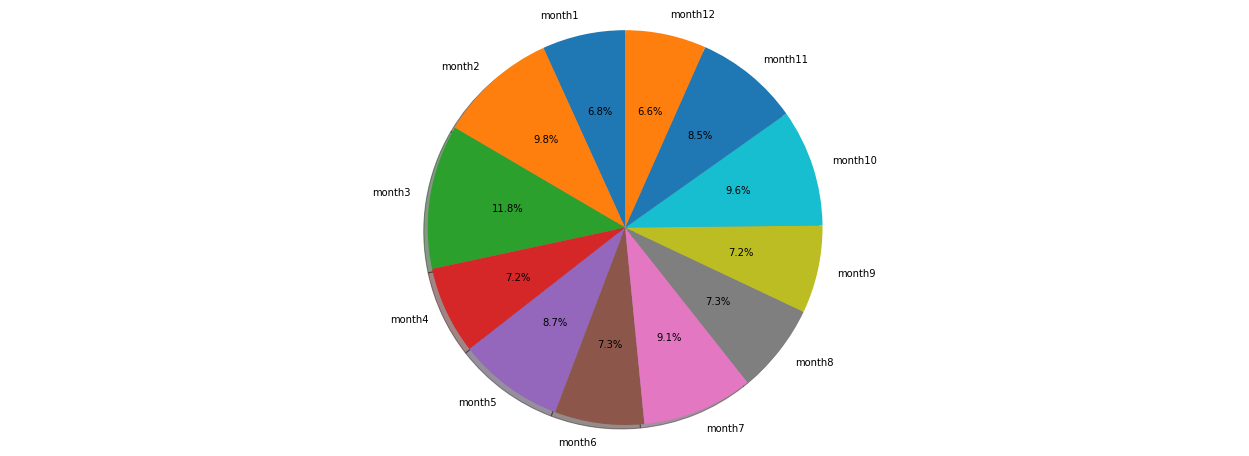

In [342]:
labels = list(months.columns.values)


labels = list(months.columns.values)[:-1]
sizes = c1


fig1, ax1 = plt.subplots(figsize=(22,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

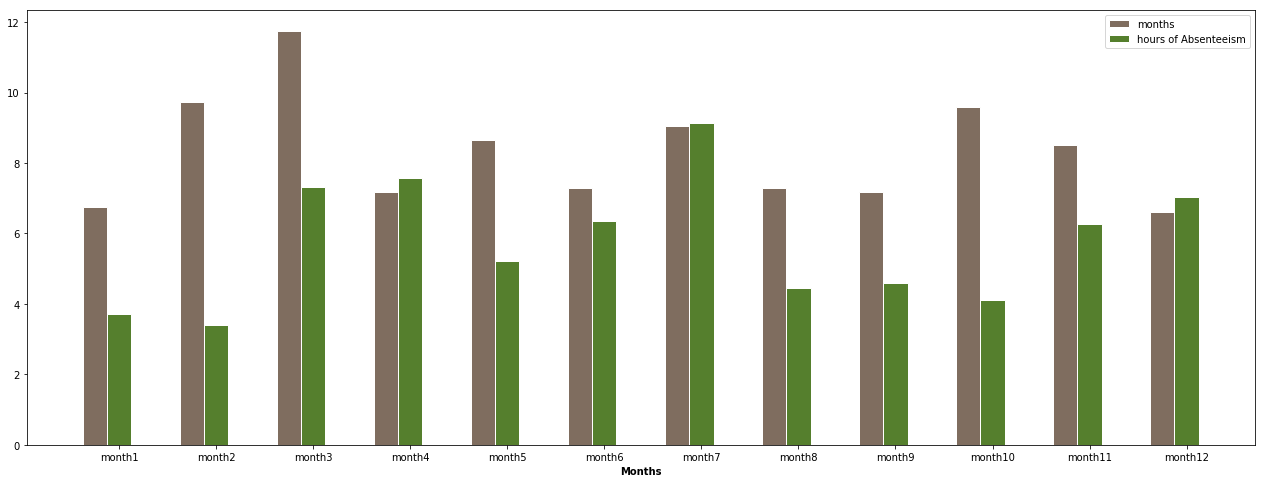

In [344]:

# x = np.arange(len(labels))
# values=[c,value_list]

# fig, ax = plt.subplots(figsize=(22,8))
# plt.bar(x, values)
# plt.xticks(x, labels)
# plt.show()

fig, ax = plt.subplots(figsize=(22,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = c1
bars2 = value_list1
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='months')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='hours of Absenteeism')
 
# Add xticks on the middle of the group bars
plt.xlabel('Months', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [398]:
data2=final_data.drop('Month of absence',axis=1)

In [406]:
final_data1=pd.concat([months,data2],axis=1)
final_data1.columns.values

array(['month1', 'month2', 'month3', 'month4', 'month5', 'month6',
       'month7', 'month8', 'month9', 'month10', 'month11', 'month12',
       'rfa1', 'rfa2', 'rfa3', 'rfa4', 'rfa5', 'rfa6', 'rfa7', 'rfa8',
       'rfa9', 'rfa10', 'rfa11', 'rfa12', 'rfa13', 'rfa14', 'rfa15',
       'rfa16', 'rfa17', 'rfa18', 'rfa19', 'rfa21', 'rfa22', 'rfa23',
       'rfa24', 'rfa25', 'rfa26', 'rfa27', 'rfa28', 'rfa29', 'ID',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype=object)

Encoding and analysis of  'Day of the week' feature

In [346]:
day=np.array(data['Day of the week'])

In [347]:
nt=[]
op=[0]*7
for i in day:
    op = [0 for i in range(7)]
    op[i]=1
    nt.append(op)

In [371]:
names = [f"day{i-1}" for i in range(7)]
days=pd.DataFrame(nt,columns=names)
days=days.drop(['day-1','day0'],axis=1)
days=pd.concat([days,target],axis=1)

In [372]:
days.describe()

,day1,day2,day3,day4,day5,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.217568,0.208108,0.210811,0.168919,0.194595,6.924324
std,0.412871,0.406229,0.408160,0.374934,0.396156,13.330998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,120.000000


In [373]:
# pie chart for "MONTHS Of ABSENCE"
c2 = []
for col in days.iloc[:,:-1]:
    i,j,*k = days[col].value_counts()
    c2.append(j*100/740)

In [374]:
count=0
mydict2 = dict()
for col in days.iloc[:,:-1]:
    mydict2[col] = []
    for i,val in enumerate(days[col]):
        if val==1:
            mydict2[col].append(days.iloc[i,-1])
for key in mydict2:
    mydict2[key] = np.mean(mydict2[key])
mydict2

{'day1': 9.248447204968944,
 'day2': 7.98051948051948,
 'day3': 7.147435897435898,
 'day4': 4.424,
 'day5': 5.125}

In [375]:
value_list2=list(mydict2.values())
v2 = np.array(value_list2)
value_list2 = v2 * 100 / 120.
value_list2

array([7.70703934, 6.6504329 , 5.95619658, 3.68666667, 4.27083333])

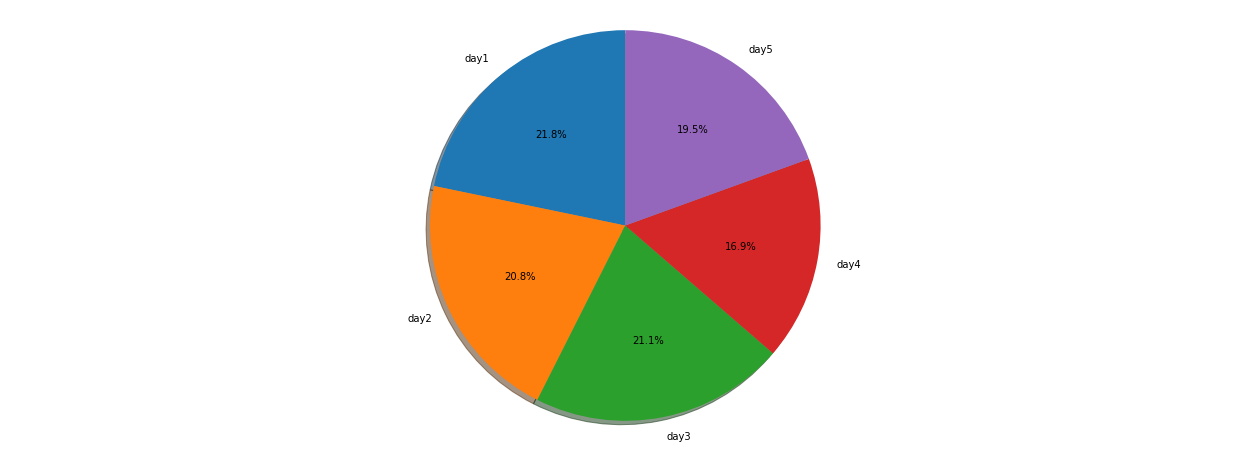

In [376]:
labels = list(days.columns.values)


labels = list(days.columns.values)[:-1]
sizes = c2


fig1, ax1 = plt.subplots(figsize=(22,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

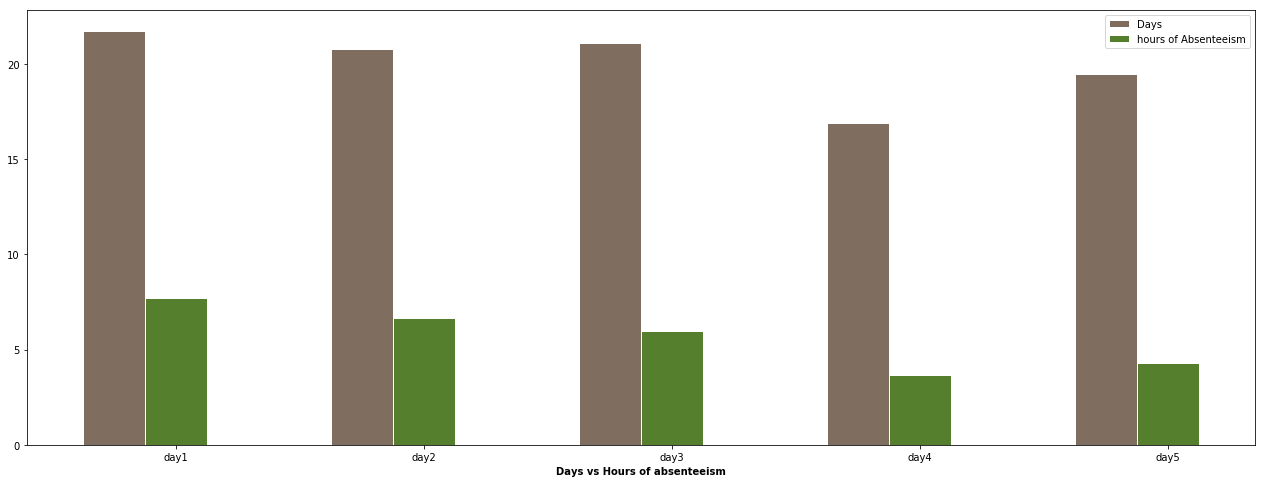

In [377]:

# x = np.arange(len(labels))
# values=[c,value_list]

# fig, ax = plt.subplots(figsize=(22,8))
# plt.bar(x, values)
# plt.xticks(x, labels)
# plt.show()

fig, ax = plt.subplots(figsize=(22,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = c2
bars2 = value_list2
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Days')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='hours of Absenteeism')
 
# Add xticks on the middle of the group bars
plt.xlabel('Days vs Hours of absenteeism', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [410]:
final_data1.columns.values

array(['month1', 'month2', 'month3', 'month4', 'month5', 'month6',
       'month7', 'month8', 'month9', 'month10', 'month11', 'month12',
       'rfa1', 'rfa2', 'rfa3', 'rfa4', 'rfa5', 'rfa6', 'rfa7', 'rfa8',
       'rfa9', 'rfa10', 'rfa11', 'rfa12', 'rfa13', 'rfa14', 'rfa15',
       'rfa16', 'rfa17', 'rfa18', 'rfa19', 'rfa21', 'rfa22', 'rfa23',
       'rfa24', 'rfa25', 'rfa26', 'rfa27', 'rfa28', 'rfa29', 'ID',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype=object)

In [411]:
data3=final_data1.drop('Day of the week',axis=1)

In [414]:
final_data2=pd.concat([days,data3],axis=1)
final_data2=final_data2.drop('ID',axis=1)

In [415]:
final_data2.columns.values

array(['day1', 'day2', 'day3', 'day4', 'day5', 'month1', 'month2',
       'month3', 'month4', 'month5', 'month6', 'month7', 'month8',
       'month9', 'month10', 'month11', 'month12', 'rfa1', 'rfa2', 'rfa3',
       'rfa4', 'rfa5', 'rfa6', 'rfa7', 'rfa8', 'rfa9', 'rfa10', 'rfa11',
       'rfa12', 'rfa13', 'rfa14', 'rfa15', 'rfa16', 'rfa17', 'rfa18',
       'rfa19', 'rfa21', 'rfa22', 'rfa23', 'rfa24', 'rfa25', 'rfa26',
       'rfa27', 'rfa28', 'rfa29', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype=object)

Encoding the 'Seasons' feature

In [416]:
season=np.array(data['Seasons'])

In [417]:
nt=[]
op=[0]*5
for i in season:
    op = [0 for i in range(5)]
    op[i]=1
    nt.append(op)

In [418]:
names = [f"season{i}" for i in range(5)]
seasons=pd.DataFrame(nt,columns=names)
data4=final_data2.drop('Seasons',axis=1)

In [433]:
final_data3=pd.concat([seasons,data4],axis=1)

In [434]:
final_data3=final_data3.drop('season0',axis=1)

In [435]:
corr=final_data3.corr('pearson')

In [439]:
final_data3.describe()

,season1,season2,season3,season4,day1,day2,day3,day4,day5,month1,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.229730,0.259459,0.247297,0.263514,0.217568,0.208108,0.210811,0.168919,0.194595,0.067568,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,0.420944,0.438635,0.431733,0.440836,0.412871,0.406229,0.408160,0.374934,0.396156,0.251172,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


#Neural Network for Regression

In [424]:
# All Activation Functions and their Transfer Derivatives

# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

# 4. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [425]:
def feed_forward(data_in, w0,w1,w2, w3, b):
    '''
    The Feed-forward considers 5 layers including input and output layer.
    
    The output layer/neuron is a regression node.
    
    returns: state of each layer
    '''
    layer0 = data_in
    layer1 = relu(np.dot(layer0, w0))
    layer2 = relu(np.dot(layer1, w1))
    layer3 = relu(np.dot(layer2, w2))
    layer4 = np.dot(layer3, w3) + b

    return layer0, layer1, layer2, layer3, layer4

In [426]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3, b, learning_rate):
    '''
    This backpropogate is only slightly different from a regular classifier
    in ways in which the output layer gradient is calculated.
    
    Since the output layer is not a function of any activation function,
    the delta doesn't need to be multiplied with the transfer derivative of the
    output layer.
    
    The rest is all the same.
    
    returns: weights and bias matrices
    '''
    
    op_delta = layer4 - actual_y
    dh4 = np.dot(layer3.T, op_delta)
    
    l3_error = op_delta.dot(w3.T)
    l3_delta = l3_error * drelu(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * drelu(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * drelu(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    b = b - (learning_rate * np.mean(op_delta))

    
   
    if i%50==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print("\n", int(i), loss)

        
    return w0, w1,w2,w3,b

In [427]:


# Normalizing all Data Points
final_data3=np.array(final_data3)
final_data3 = (final_data3 - final_data3.min()) / (final_data3.max() - final_data3.min())

# Picking all columns other than the last one as X
X = np.array(final_data3[:,:-1])

# And the last one as Y
Y = np.array(final_data3[:,-1])

# Need to reshape it to be able to pass through the network
Y =Y.reshape(len(Y), 1)

# Split the data into respective test and train
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2)

In [440]:
w0 = np.random.random((64,80))
w1 = np.random.random((80,50))
w2 = np.random.random((50, 15))
w3 = np.random.random((15,1))
b = np.random.random((1,1))
#print(b)

epochs = 10000

In [441]:
# Initialising variables to track loss vs iterations so we can plot the changes
loss_curve = []
iters = []

Start learning 

In [442]:
for i in tqdm_notebook(range(epochs)):
    layer0, layer1, layer2, layer3, layer4 = feed_forward(xtrain, w0,w1,w2,w3,b)
    w0, w1,w2,w3,b = backpropogate(i,layer0, layer1, layer2, layer3, layer4, ytrain, w0,w1,w2,w3, b, 0.001 )
    


 1000 5.998078237548005

 2000 0.8121258617981529

 3000 0.11098548748178844

 4000 0.016191361181040323

 5000 0.0033752023770580284

 6000 0.0016424586628771135

 7000 0.0014081918419868676

 8000 0.0013765189852793969

 9000 0.0013722368174154211



In [443]:
layer0, layer1, layer2, layer3, layer4 = feed_forward(xtest, w0,w1,w2,w3,b)
loss = np.mean(np.power(layer4-ytest, 2))
print(np.sqrt(loss))

0.02022634229610293


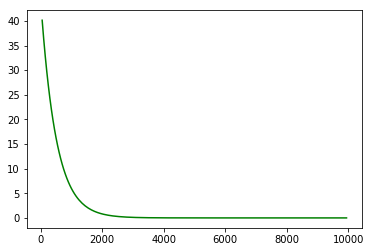

In [444]:
plt.plot(iters, loss_curve, 'g-')